In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/DSW/BMKG/Solar_Radiation_Flux.csv'
solar_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
solar_data.head()


,latitude,longitude,2021-01-01,2021-01-02,2021-01-03,2021-01-04,2021-01-05,2021-01-06,2021-01-07,2021-01-08,...,2023-12-22,2023-12-23,2023-12-24,2023-12-25,2023-12-26,2023-12-27,2023-12-28,2023-12-29,2023-12-30,2023-12-31
0,5.9,95.3,17713312.0,16205003.0,13341886.0,12096697.0,14620506.0,14255448.0,18361810.0,16538773.0,...,19189148.0,18265410.0,12086888.0,6160977.0,12878213.0,17599572.0,19620222.0,18287442.0,11051504.0,10205500.0
1,5.9,95.4,17587100.0,16091586.0,13258950.0,12025490.0,14518316.0,14158409.0,18216604.0,16412757.0,...,19067818.0,18152318.0,12037298.0,6173935.5,12814659.0,17485942.0,19481072.0,18160972.0,11000017.0,10162593.0
2,5.9,100.3,18432382.0,13847293.0,11728504.0,15656100.0,14202653.0,13519235.0,18521502.0,17803960.0,...,19256504.0,13958071.0,8267493.0,7827573.0,14687958.0,18033500.0,17631700.0,17092446.0,13164425.0,16698097.0
3,5.9,100.4,17672888.0,13157677.0,11071346.0,14937889.0,13506804.0,12833372.0,17760052.0,17053708.0,...,18489186.0,13269682.0,7665755.5,7232126.0,13987653.0,17282050.0,16885578.0,16354123.0,12486011.0,15965301.0
4,5.9,100.5,17081610.0,12595264.0,10523236.0,14366334.0,12945625.0,12276740.0,17175680.0,16475366.0,...,17884586.0,12696108.0,7127573.0,6697053.0,13413101.0,16688259.0,16295185.0,15767426.0,11924299.0,15383750.0


In [ ]:
import numpy as np

# Calculate the annual total solar irradiance for each coordinate
solar_data['annual_total'] = solar_data.iloc[:, 2:].sum(axis=1)

# Find the threshold for the top 5% areas
threshold = np.percentile(solar_data['annual_total'], 95)

# Select the top 5% areas
top_5_percent_areas = solar_data[solar_data['annual_total'] >= threshold]

# Display the top 5% areas
top_5_percent_areas[['latitude', 'longitude', 'annual_total']]


,latitude,longitude,annual_total
5623,1.5,121.0,2.222327e+10
5624,1.5,121.1,2.231545e+10
5625,1.5,121.2,2.235493e+10
5626,1.5,121.3,2.236704e+10
5627,1.5,121.4,2.235148e+10
...,...,...,...
25171,-11.0,132.2,2.331407e+10
25172,-11.0,132.3,2.331252e+10
25173,-11.0,132.4,2.326277e+10
25174,-11.0,132.5,2.316804e+10


In [ ]:
import matplotlib.pyplot as plt
import folium

# Create a map centered around Indonesia
map_center = [0.7893, 113.9213]
# Create a map centered around Indonesia
indonesia_map_updated = folium.Map(location=map_center, zoom_start=5)

# Plot the top 5% areas on the map with coordinates in the popup
for idx, row in top_5_percent_areas.iterrows():
    popup_text = f"Coordinates: ({row['latitude']}, {row['longitude']})<br>Total Irradiance: {row['annual_total']}"
    folium.Marker(location=[row['latitude'], row['longitude']], popup=popup_text).add_to(indonesia_map_updated)

# Save the updated map to an HTML file
updated_map_path = 'indonesia_solar_irradiance_map_updated.html'
indonesia_map_updated.save(updated_map_path)
updated_map_path

'indonesia_solar_irradiance_map_updated.html'

In [ ]:
# Calculate the percentage rank for each grid based on its annual total
solar_data['percentile_rank'] = solar_data['annual_total'].rank(pct=True) * 100

# Create a color column based on the percentile rank
def get_color(percentile):
    if percentile > 99:
        return 'red'
    elif percentile > 98:
        return 'orange'
    elif percentile > 97:
        return 'yellow'
    else:
        return 'blue'

solar_data['color'] = solar_data['percentile_rank'].apply(get_color)

# Create a map centered around Indonesia
color_coded_map = folium.Map(location=map_center, zoom_start=5)

# Plot the areas on the map with color coding
for idx, row in solar_data.iterrows():
    popup_text = f"Coordinates: ({row['latitude']}, {row['longitude']})<br>Total Irradiance: {row['annual_total']}"
    folium.Marker(location=[row['latitude'], row['longitude']], popup=popup_text, icon=folium.Icon(color=row['color'])).add_to(color_coded_map)

# Save the color-coded map to an HTML file
color_coded_map_path = 'indonesia_solar_irradiance_color_coded_map.html'
color_coded_map.save(color_coded_map_path)
color_coded_map_path

<ipython-input-27-d35634aa9bae>:23: UserWarning: color argument of Icon should be one of: {'darkgreen', 'lightgray', 'darkpurple', 'orange', 'darkblue', 'lightred', 'green', 'cadetblue', 'black', 'purple', 'white', 'gray', 'pink', 'beige', 'lightgreen', 'red', 'blue', 'lightblue', 'darkred'}.
  folium.Marker(location=[row['latitude'], row['longitude']], popup=popup_text, icon=folium.Icon(color=row['color'])).add_to(color_coded_map)


'indonesia_solar_irradiance_color_coded_map.html'

In [ ]:
from scipy.spatial import cKDTree

# Extract the coordinates of all grids
all_coords = solar_data[['latitude', 'longitude']].values

# Create a KDTree for efficient neighbor search
tree = cKDTree(all_coords)

# Function to find neighbors within a 5x5 grid (~25km x 25km)
def find_neighbors(lat, lon, radius=2):
    idx = tree.query_ball_point([lat, lon], radius)
    return idx

# Create a new DataFrame to store the averaged values
averaged_data_list = []

# Calculate the average daily values for each top 5% grid with its surrounding grids
for idx, row in top_5_percent_areas.iterrows():
    neighbors_idx = find_neighbors(row['latitude'], row['longitude'])
    neighbors_data = solar_data.iloc[neighbors_idx, 2:-1]  # Exclude the first three columns and the annual_total column
    averaged_values = neighbors_data.mean(axis=0)
    averaged_row = pd.Series(averaged_values, index=solar_data.columns[3:-1])
    averaged_row['latitude'] = row['latitude']
    averaged_row['longitude'] = row['longitude']
    averaged_data_list.append(averaged_row)

averaged_data = pd.DataFrame(averaged_data_list)

# Add the annual total for reference
averaged_data['annual_total'] = top_5_percent_areas['annual_total'].values



averaged_data.head()



,2021-01-02,2021-01-03,2021-01-04,2021-01-05,2021-01-06,2021-01-07,2021-01-08,2021-01-09,2021-01-10,2021-01-11,...,2023-12-26,2023-12-27,2023-12-28,2023-12-29,2023-12-30,2023-12-31,annual_total,percentile_rank,latitude,longitude
0,1.908969e+07,1.819068e+07,1.511221e+07,1.383924e+07,1.037637e+07,1.631678e+07,1.732216e+07,1.973860e+07,2.020655e+07,1.937341e+07,...,1.905995e+07,1.890852e+07,1.819811e+07,1.936854e+07,1.847456e+07,1.800255e+07,2.222327e+10,69.224637,1.5,121.0
1,1.910172e+07,1.818848e+07,1.516141e+07,1.392528e+07,1.030898e+07,1.616039e+07,1.736425e+07,1.977298e+07,2.021490e+07,1.946863e+07,...,1.911683e+07,1.894925e+07,1.827971e+07,1.941248e+07,1.851930e+07,1.806272e+07,2.231545e+10,69.478463,1.5,121.1
2,1.910633e+07,1.818055e+07,1.519355e+07,1.397180e+07,1.027567e+07,1.605500e+07,1.741831e+07,1.981279e+07,2.023169e+07,1.953752e+07,...,1.919425e+07,1.901017e+07,1.836781e+07,1.946378e+07,1.858454e+07,1.813731e+07,2.235493e+10,69.867255,1.5,121.2
3,1.909328e+07,1.815512e+07,1.520883e+07,1.400435e+07,1.022986e+07,1.593324e+07,1.746196e+07,1.984111e+07,2.023822e+07,1.959022e+07,...,1.926502e+07,1.905959e+07,1.843807e+07,1.949891e+07,1.863359e+07,1.819720e+07,2.236704e+10,70.083077,1.5,121.3
4,1.907566e+07,1.812714e+07,1.523305e+07,1.404329e+07,1.017603e+07,1.580336e+07,1.750951e+07,1.987398e+07,2.024446e+07,1.964558e+07,...,1.933949e+07,1.910852e+07,1.851174e+07,1.953460e+07,1.868264e+07,1.825602e+07,2.235148e+10,70.256438,1.5,121.4


In [ ]:
averaged_data

,2021-01-02,2021-01-03,2021-01-04,2021-01-05,2021-01-06,2021-01-07,2021-01-08,2021-01-09,2021-01-10,2021-01-11,...,2023-12-26,2023-12-27,2023-12-28,2023-12-29,2023-12-30,2023-12-31,annual_total,percentile_rank,latitude,longitude
0,1.908969e+07,1.819068e+07,1.511221e+07,1.383924e+07,1.037637e+07,1.631678e+07,1.732216e+07,1.973860e+07,2.020655e+07,1.937341e+07,...,1.905995e+07,1.890852e+07,1.819811e+07,1.936854e+07,1.847456e+07,1.800255e+07,2.222327e+10,69.224637,1.5,121.0
1,1.910172e+07,1.818848e+07,1.516141e+07,1.392528e+07,1.030898e+07,1.616039e+07,1.736425e+07,1.977298e+07,2.021490e+07,1.946863e+07,...,1.911683e+07,1.894925e+07,1.827971e+07,1.941248e+07,1.851930e+07,1.806272e+07,2.231545e+10,69.478463,1.5,121.1
2,1.910633e+07,1.818055e+07,1.519355e+07,1.397180e+07,1.027567e+07,1.605500e+07,1.741831e+07,1.981279e+07,2.023169e+07,1.953752e+07,...,1.919425e+07,1.901017e+07,1.836781e+07,1.946378e+07,1.858454e+07,1.813731e+07,2.235493e+10,69.867255,1.5,121.2
3,1.909328e+07,1.815512e+07,1.520883e+07,1.400435e+07,1.022986e+07,1.593324e+07,1.746196e+07,1.984111e+07,2.023822e+07,1.959022e+07,...,1.926502e+07,1.905959e+07,1.843807e+07,1.949891e+07,1.863359e+07,1.819720e+07,2.236704e+10,70.083077,1.5,121.3
4,1.907566e+07,1.812714e+07,1.523305e+07,1.404329e+07,1.017603e+07,1.580336e+07,1.750951e+07,1.987398e+07,2.024446e+07,1.964558e+07,...,1.933949e+07,1.910852e+07,1.851174e+07,1.953460e+07,1.868264e+07,1.825602e+07,2.235148e+10,70.256438,1.5,121.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2.005108e+07,2.451670e+07,2.351826e+07,2.076162e+07,1.925146e+07,2.522025e+07,2.402441e+07,2.138078e+07,2.234135e+07,1.966973e+07,...,2.121190e+07,2.372454e+07,2.697902e+07,2.613344e+07,2.475396e+07,2.681145e+07,2.331407e+10,98.268854,-11.0,132.2
1255,2.005108e+07,2.451670e+07,2.351826e+07,2.076162e+07,1.925146e+07,2.522025e+07,2.402441e+07,2.138078e+07,2.234135e+07,1.966973e+07,...,2.121190e+07,2.372454e+07,2.697902e+07,2.613344e+07,2.475396e+07,2.681145e+07,2.331252e+10,98.268854,-11.0,132.3
1256,2.005108e+07,2.451670e+07,2.351826e+07,2.076162e+07,1.925146e+07,2.522025e+07,2.402441e+07,2.138078e+07,2.234135e+07,1.966973e+07,...,2.121190e+07,2.372454e+07,2.697902e+07,2.613344e+07,2.475396e+07,2.681145e+07,2.326277e+10,98.268854,-11.0,132.4
1257,2.005108e+07,2.451670e+07,2.351826e+07,2.076162e+07,1.925146e+07,2.522025e+07,2.402441e+07,2.138078e+07,2.234135e+07,1.966973e+07,...,2.121190e+07,2.372454e+07,2.697902e+07,2.613344e+07,2.475396e+07,2.681145e+07,2.316804e+10,98.268854,-11.0,132.5


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
top_10_coordinates = solar_data.nlargest(10, 'annual_total')[['latitude', 'longitude', 'annual_total']]

# Create a map centered around the average location of the top 10 coordinates
avg_lat = top_10_coordinates['latitude'].mean()
avg_lon = top_10_coordinates['longitude'].mean()
top_10_map = folium.Map(location=[avg_lat, avg_lon], zoom_start=6)

# Plot the top 10 coordinates on the map
for idx, row in top_10_coordinates.iterrows():
    popup_text = f"Coordinates: ({row['latitude']}, {row['longitude']})<br>Total Irradiance: {row['annual_total']}"
    folium.Marker(location=[row['latitude'], row['longitude']], popup=popup_text, icon=folium.Icon(color='green')).add_to(top_10_map)

# Save the map to an HTML file
top_10_map_path = 'top_10_solar_irradiance_map.html'
top_10_map.save(top_10_map_path)
top_10_map_path


'top_10_solar_irradiance_map.html'

In [ ]:
from geopy.distance import geodesic

# Function to check if a point is at least 100 km away from all points in the list
def is_far_enough(point, selected_points, min_distance_km=100):
    for sp in selected_points:
        if geodesic((point['latitude'], point['longitude']), (sp['latitude'], sp['longitude'])).km < min_distance_km:
            return False
    return True

# Initialize the list of selected points with the highest irradiance point
selected_points = [solar_data.iloc[solar_data['annual_total'].idxmax()]]

# Iterate to find the next highest irradiance point that is at least 100 km away from all selected points
for idx, row in solar_data.sort_values(by='annual_total', ascending=False).iterrows():
    if len(selected_points) >= 10:
        break
    if is_far_enough(row, selected_points):
        selected_points.append(row)

# Convert the selected points list to a DataFrame
selected_points_df = pd.DataFrame(selected_points)

#import ace_tools as tools; tools.display_dataframe_to_user(name="Top 10 Distant Coordinates by Solar Irradiance", dataframe=selected_points_df)

selected_points_df[['latitude', 'longitude', 'annual_total']]


,latitude,longitude,annual_total
24338,-8.8,123.6,2.425359e+10
23527,-8.3,125.7,2.402789e+10
24624,-9.1,122.2,2.394081e+10
24801,-9.5,120.4,2.391585e+10
24598,-9.1,119.1,2.390454e+10
24533,-9.0,124.5,2.386165e+10
23484,-8.3,121.4,2.384537e+10
25046,-10.3,123.1,2.384173e+10
25095,-10.5,122.2,2.377232e+10
23102,-8.1,118.5,2.370710e+10


In [ ]:
from geopy.distance import distance

# Sort the data by annual total solar irradiance in descending order
sorted_data = solar_data.sort_values(by='annual_total', ascending=False)

# Function to check if a point is at least 100 km away from all selected points
def is_far_enough(point, selected_points, min_distance_km=100):
    for selected_point in selected_points:
        if distance((point['latitude'], point['longitude']), (selected_point['latitude'], selected_point['longitude'])).km < min_distance_km:
            return False
    return True

# Select the top 10 coordinates ensuring each is at least 100 km apart
selected_points = []
for idx, row in sorted_data.iterrows():
    if len(selected_points) == 30:
        break
    if is_far_enough(row, selected_points):
        selected_points.append(row)

# Convert the list of selected points to a DataFrame
top_10_spread_out_coordinates = pd.DataFrame(selected_points)

# Create a map centered around the average location of the selected coordinates
avg_lat = top_10_spread_out_coordinates['latitude'].mean()
avg_lon = top_10_spread_out_coordinates['longitude'].mean()
spread_out_map = folium.Map(location=[avg_lat, avg_lon], zoom_start=5)

# Plot the selected coordinates on the map
for idx, row in top_10_spread_out_coordinates.iterrows():
    popup_text = f"Coordinates: ({row['latitude']}, {row['longitude']})<br>Total Irradiance: {row['annual_total']}"
    folium.Marker(location=[row['latitude'], row['longitude']], popup=popup_text, icon=folium.Icon(color='purple')).add_to(spread_out_map)

# Save the map to an HTML file
spread_out_map_path = 'spread_out_top_10_solar_irradiance_map.html'
spread_out_map.save(spread_out_map_path)
spread_out_map_path


'spread_out_top_10_solar_irradiance_map.html'

In [ ]:
# Load the dataset
file_path = '/content/drive/MyDrive/DSW/BMKG/Solar_Radiation_Flux.csv'
solar_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
solar_data.head()

In [ ]:
import pandas as pd
from geopy.distance import distance

# Load the data files
temp_data = pd.read_csv('/content/drive/MyDrive/DSW/BMKG/temperatur.csv')
rainfall_data = pd.read_csv('/content/drive/MyDrive/DSW/BMKG/curah_hujan.csv')
humidity_data = pd.read_csv('/content/drive/MyDrive/DSW/BMKG/kelembapan.csv')

In [ ]:
temp_data.dropna(inplace=True)
rainfall_data.dropna(inplace=True)
humidity_data.dropna(inplace=True)

In [ ]:
humidity_data

,latitude,longitude,2020-12-31,2021-01-01,2021-01-02,2021-01-03,2021-01-04,2021-01-05,2021-01-06,2021-01-07,...,2023-12-22,2023-12-23,2023-12-24,2023-12-25,2023-12-26,2023-12-27,2023-12-28,2023-12-29,2023-12-30,2023-12-31
0,-10.35,123.60,71.358370,78.729210,81.222030,81.409515,79.975620,84.582825,85.245964,82.020570,...,78.159820,78.204950,83.884980,76.534966,75.566310,77.361280,78.861140,80.156160,77.073110,78.236200
1,-10.30,123.55,71.372260,78.770874,81.496310,81.774060,80.225590,85.023760,85.648700,82.228880,...,77.552240,78.218840,84.020380,76.708565,75.496870,77.194630,77.951500,78.579920,75.281620,76.930760
2,-10.30,123.60,71.913870,78.940994,81.607414,81.829610,80.426960,85.048065,85.922980,82.753136,...,78.375080,78.437570,84.228690,77.093950,75.642690,77.347400,78.357710,79.427060,76.239860,77.534874
3,-10.30,123.65,72.458960,79.107640,81.718510,81.885160,80.631805,85.068890,86.193790,83.280870,...,79.201385,78.659770,84.433530,77.475850,75.791985,77.500160,78.760450,80.277670,77.194630,78.138985
4,-10.30,123.70,73.004050,79.274300,81.829610,81.940710,80.833176,85.089720,86.464600,83.808590,...,80.024220,78.878500,84.638380,77.861240,75.937805,77.652920,79.166664,81.128290,78.149400,78.743095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69386,5.45,95.55,83.475296,87.308266,85.690360,87.895020,89.870530,87.766556,89.183090,86.669440,...,85.673004,85.336230,94.470795,95.866490,88.964360,86.773600,84.468254,88.714386,95.210304,91.922420
69387,5.45,95.60,83.645420,87.353400,85.954230,87.575610,89.193504,87.606850,88.950480,86.738880,...,86.023670,85.631340,94.439545,95.005460,89.141426,87.217995,84.961266,89.193504,94.731186,91.050970
69388,5.45,95.65,83.819010,87.398540,86.218094,87.252716,88.516490,87.443670,88.717860,86.804840,...,86.370860,85.926450,94.408295,94.147900,89.315025,87.658930,85.457750,89.672630,94.255530,90.183000
69389,5.45,95.70,83.989136,87.440200,86.481960,86.933304,87.839470,87.283966,88.485240,86.874280,...,86.718050,86.218094,94.373580,93.286870,89.492090,88.099860,85.950750,90.148280,93.776410,89.311554


In [ ]:
# Coordinates of interest
coordinates_of_interest = [
    (-9.599999999994338, 124.8999999999827),
    (-8.599999999994395, 119.49999999998296),
    (-5.599999999994566, 123.79999999998272),
    (-9.099999999994369, 124.69999999998264),
    (-9.599999999994338, 120.19999999998294)
]

# Function to find neighbors within a specified radius
def find_neighbors(df, lat, lon, radius_km=50):
    neighbors = []
    for idx, row in df.iterrows():
        if distance((lat, lon), (row['latitude'], row['longitude'])).km <= radius_km:
            neighbors.append(idx)
    return df.iloc[neighbors]

# Calculate daily averages for each coordinate of interest
daily_averages = []

for lat, lon in coordinates_of_interest:
    temp_neighbors = find_neighbors(temp_data, lat, lon)
    rainfall_neighbors = find_neighbors(rainfall_data, lat, lon)
    humidity_neighbors = find_neighbors(humidity_data, lat, lon)

    temp_daily_avg = temp_neighbors.iloc[:, 2:].mean(axis=0)  # Assuming the first two columns are latitude and longitude
    rainfall_daily_avg = rainfall_neighbors.iloc[:, 2:].mean(axis=0)
    humidity_daily_avg = humidity_neighbors.iloc[:, 2:].mean(axis=0)

    daily_avg = pd.DataFrame({
        'date': temp_neighbors.columns[2:],  # Assuming the first two columns are latitude and longitude
        'temp_avg': temp_daily_avg.values,
        'rainfall_avg': rainfall_daily_avg.values,
        'humidity_avg': humidity_daily_avg.values
    })
    daily_avg['coordinate'] = f"({lat}, {lon})"

    daily_averages.append(daily_avg)

# Combine all daily averages into a single DataFrame
final_daily_averages = pd.concat(daily_averages, ignore_index=True)

<ipython-input-25-ae29e1beba12>:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if pd.isna(temp_daily_avg[i]):
<ipython-input-25-ae29e1beba12>:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if pd.isna(rainfall_daily_avg[i]):
<ipython-input-25-ae29e1beba12>:43: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  rainfall_daily_avg[i] = nearest_valid[rainfall_daily_avg.index[i]]
<ipython-input-25-ae29e1beba12>:44: FutureWarning: S

KeyboardInterrupt: 

In [ ]:
import random

# Original coordinates of interest
coordinates_of_interest = [
    (-9.599999999994338, 124.8999999999827),
    (-8.599999999994395, 119.49999999998296),
    (-5.599999999994566, 123.79999999998272),
    (-9.099999999994369, 124.69999999998264),
    (-9.599999999994338, 120.19999999998294)
]

# Find random coordinates that have values in the rainfall data
rainfall_coords = rainfall_data[['latitude', 'longitude']]
temp_coords = temp_data[['latitude', 'longitude']]
humidity_coords = humidity_data[['latitude', 'longitude']]

# Find intersection of coordinates that have all three data types
valid_coords = pd.merge(pd.merge(temp_coords, rainfall_coords, on=['latitude', 'longitude']), humidity_coords, on=['latitude', 'longitude'])

# Select a random sample of 5 coordinates for the rainfall data
random_rainfall_coords = valid_coords.sample(5, random_state=1)

# Replace the problematic coordinate with a random valid coordinate
problematic_coord = (-5.599999999994566, 123.79999999998272)
replacement_coord = valid_coords.sample(1, random_state=2).iloc[0]

# Updated coordinates of interest
updated_coordinates_of_interest = [
    (-9.599999999994338, 124.8999999999827),
    (-8.599999999994395, 119.49999999998296),
    (replacement_coord['latitude'], replacement_coord['longitude']),
    (-9.099999999994369, 124.69999999998264),
    (-9.599999999994338, 120.19999999998294)
]

# Add the random rainfall coordinates
updated_coordinates_of_interest.extend(random_rainfall_coords[['latitude', 'longitude']].values.tolist())

# Function to find neighbors within a specified radius
def find_neighbors(df, lat, lon, radius_km=25):
    neighbors = []
    for idx, row in df.iterrows():
        if distance((lat, lon), (row['latitude'], row['longitude'])).km <= radius_km:
            neighbors.append(idx)
    return df.iloc[neighbors]

# Calculate daily averages for each updated coordinate of interest
daily_averages = []

for coord in updated_coordinates_of_interest:
    lat, lon = coord
    temp_neighbors = find_neighbors(temp_data, lat, lon)
    rainfall_neighbors = find_neighbors(rainfall_data, lat, lon)
    humidity_neighbors = find_neighbors(humidity_data, lat, lon)

    # Align dates across all datasets
    common_dates = temp_neighbors.columns[2:].intersection(rainfall_neighbors.columns[2:]).intersection(humidity_neighbors.columns[2:])

    temp_daily_avg = temp_neighbors[common_dates].mean(axis=0)
    rainfall_daily_avg = rainfall_neighbors[common_dates].mean(axis=0)
    humidity_daily_avg = humidity_neighbors[common_dates].mean(axis=0)

    daily_avg = pd.DataFrame({
        'date': common_dates,
        'temp_avg': temp_daily_avg.values,
        'rainfall_avg': rainfall_daily_avg.values,
        'humidity_avg': humidity_daily_avg.values
    })
    daily_avg['coordinate'] = f"({lat}, {lon})"

    daily_averages.append(daily_avg)

# Combine all daily averages into a single DataFrame
final_daily_averages = pd.concat(daily_averages, ignore_index=True)

# Save the final DataFrame to a CSV file
final_daily_averages.to_csv('daily_averages_for_updated_coordinates.csv', index=False)


In [ ]:
final_daily_averages

,date,temp_avg,rainfall_avg,humidity_avg,coordinate
0,2020-12-31,25.961633,NaN,14.328861,"(-9.599999999994338, 124.8999999999827)"
1,2021-01-01,26.709842,NaN,15.769024,"(-9.599999999994338, 124.8999999999827)"
2,2021-01-02,26.382901,NaN,6.321344,"(-9.599999999994338, 124.8999999999827)"
3,2021-01-03,26.717445,NaN,15.685986,"(-9.599999999994338, 124.8999999999827)"
4,2021-01-04,26.659452,NaN,11.615775,"(-9.599999999994338, 124.8999999999827)"
...,...,...,...,...,...
10955,2023-12-27,26.243891,11.927485,18.742334,"(0.2999999999999989, 103.4)"
10956,2023-12-28,26.152536,11.744503,35.996506,"(0.2999999999999989, 103.4)"
10957,2023-12-29,26.120336,8.301219,18.281319,"(0.2999999999999989, 103.4)"
10958,2023-12-30,26.409972,10.371210,23.520946,"(0.2999999999999989, 103.4)"


# URAAA

In [ ]:
import pandas as pd

# Load the data from the provided file
file_path = '/content/daily_averages_for_updated_coordinates.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head()


,date,temp_avg,rainfall_avg,humidity_avg,coordinate
0,2020-12-31,25.961633,NaN,14.328861,"(-9.599999999994338, 124.8999999999827)"
1,2021-01-01,26.709842,NaN,15.769024,"(-9.599999999994338, 124.8999999999827)"
2,2021-01-02,26.382901,NaN,6.321344,"(-9.599999999994338, 124.8999999999827)"
3,2021-01-03,26.717445,NaN,15.685986,"(-9.599999999994338, 124.8999999999827)"
4,2021-01-04,26.659452,NaN,11.615775,"(-9.599999999994338, 124.8999999999827)"


In [ ]:
# Convert 'date' to datetime
data['date'] = pd.to_datetime(data['date'])

# Sort the data by 'date' and 'coordinate'
data.sort_values(by=['coordinate', 'date'], inplace=True)

# Interpolate NaN values
data.interpolate(method='time', inplace=True)

# Check if there are any remaining NaN values
print(data.isna().sum())


ValueError: time-weighted interpolation only works on Series or DataFrames with a DatetimeIndex

In [ ]:
data

,date,temp_avg,rainfall_avg,humidity_avg,coordinate
7672,2020-12-31,26.019898,19.674356,10.816199,"(-1.450000000000001, 113.45)"
7673,2021-01-01,25.702097,18.501178,9.255659,"(-1.450000000000001, 113.45)"
7674,2021-01-02,25.932753,7.313084,2.171475,"(-1.450000000000001, 113.45)"
7675,2021-01-03,25.600385,10.418566,24.713885,"(-1.450000000000001, 113.45)"
7676,2021-01-04,25.631423,11.382443,35.509380,"(-1.450000000000001, 113.45)"
...,...,...,...,...,...
3283,2023-12-27,26.407593,14.404728,3.749824,"(0.5499999999999989, 99.4)"
3284,2023-12-28,26.390368,15.351320,7.979894,"(0.5499999999999989, 99.4)"
3285,2023-12-29,26.205332,4.428775,6.066320,"(0.5499999999999989, 99.4)"
3286,2023-12-30,26.653886,14.834323,52.756865,"(0.5499999999999989, 99.4)"


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import pickle

# Load data
file_path = '/content/daily_averages_for_updated_coordinates.csv'
data = pd.read_csv(file_path)

# Convert 'date' to datetime
data['date'] = pd.to_datetime(data['date'])

# Separate data by coordinate
coordinates = data['coordinate'].unique()
columns = ['temp_avg', 'rainfall_avg', 'humidity_avg']

# Function to prepare LSTM data
def prepare_lstm_data(df, column, look_back=7):
    scaler = MinMaxScaler(feature_range=(0, 1))
    df[column] = scaler.fit_transform(df[column].values.reshape(-1, 1))

    X, y = [], []
    for i in range(len(df) - look_back):
        X.append(df[column].values[i:(i + look_back)])
        y.append(df[column].values[i + look_back])
    X, y = np.array(X), np.array(y)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))
    return X, y, scaler

# Function to create and train LSTM model
def create_and_train_lstm(X, y, epochs=50, batch_size=16):
    model = Sequential()
    model.add(LSTM(100, return_sequences=True, input_shape=(X.shape[1], 1)))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.summary()
    model.fit(X, y, epochs=epochs, batch_size=batch_size, verbose=1)
    return model

# Process data for each coordinate
for coord in coordinates:
    df_coord = data[data['coordinate'] == coord].copy()
    df_coord.set_index('date', inplace=True)

    # Interpolate NaN values
    df_coord.interpolate(method='time', inplace=True)

    for column in columns:
        X, y, scaler = prepare_lstm_data(df_coord, column)
        model = create_and_train_lstm(X, y)
        # Save the model and scaler if needed
        model.save(f'model_{coord}_{column}.h5')
        with open(f'scaler_{coord}_{column}.pkl', 'wb') as f:
            pickle.dump(scaler, f)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_14 (LSTM)                       │ (None, 7, 100)              │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_15 (LSTM)                       │ (None, 50)                  │          30,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,051 (277.54 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0986
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0103
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0075
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0072
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0071
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0076
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0066
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0067
Epoch 9/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0065
Epoch 10/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0067
Epoch 11/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0068
Epoch 12/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0075
Epoch 13/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0079
Epoch 14/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0066
Epoch 15/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0055
Epoch 16/50
35/35 ━

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                       │ (None, 7, 100)              │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_17 (LSTM)                       │ (None, 50)                  │          30,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,051 (277.54 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: nan
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan
Epoch 9/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan
Epoch 10/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan
Epoch 11/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan
Epoch 12/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan
Epoch 13/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan
Epoch 14/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan
Epoch 15/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan
Epoch 16/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan
E

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_18 (LSTM)                       │ (None, 7, 100)              │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_19 (LSTM)                       │ (None, 50)                  │          30,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,051 (277.54 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0078
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0062
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0064
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0070
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0067
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0057
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0072
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0056
Epoch 9/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0051
Epoch 10/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0067
Epoch 11/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0060
Epoch 12/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0072
Epoch 13/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0055
Epoch 14/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0049
Epoch 15/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0052
Epoch 16/50
35/35 ━

KeyboardInterrupt: 

In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize

# Define file paths
solar_radiation_path = '/content/drive/MyDrive/DSW/BMKG/Solar_Radiation_Flux.csv'
rainfall_path = '/content/drive/MyDrive/DSW/BMKG/curah_hujan.csv'
humidity_path = '/content/drive/MyDrive/DSW/BMKG/kelembapan.csv'
temperature_path = '/content/drive/MyDrive/DSW/BMKG/temperatur.csv'

# Load the data
solar_radiation = pd.read_csv(solar_radiation_path)
rainfall = pd.read_csv(rainfall_path)
humidity = pd.read_csv(humidity_path)
temperature = pd.read_csv(temperature_path)

# Reshape data from wide format to long format
def reshape_data(df, value_name):
    df_long = pd.melt(df, id_vars=['latitude', 'longitude'], var_name='Date', value_name=value_name)
    df_long['Date'] = pd.to_datetime(df_long['Date'])
    df_long['latitude'] = df_long['latitude'].round(2)
    df_long['longitude'] = df_long['longitude'].round(2)
    return df_long

solar_radiation_long = reshape_data(solar_radiation, 'Solar_Irradiance')
rainfall_long = reshape_data(rainfall, 'Rainfall')
humidity_long = reshape_data(humidity, 'Humidity')
temperature_long = reshape_data(temperature, 'Temperature')

# Coordinates of interest
coordinates_of_interest = [
    (-9.60, 124.90),
    (-8.60, 119.50),
    (-9.10, 124.70),
    (-9.60, 120.20)
]

# Function to adjust efficiency based on the month
def seasonal_efficiency_adjustment(date):
    month = date.month
    if month in [6, 7, 8, 9]:  # Dry season (higher efficiency)
        return np.random.uniform(0.18, 0.22)
    elif month in [11, 12, 1, 2, 3]:  # Rainy season (lower efficiency)
        return np.random.uniform(0.10, 0.15)
    else:  # Transitional months (moderate efficiency)
        return np.random.uniform(0.15, 0.18)

# Define the model function
def solar_power_model(params, X):
    eta_max, beta, alpha, gamma, delta = params
    I, T, H, R_clean, R_degrade = X
    eta_T = eta_max * (1 - beta * (T - 25))
    eta_H = eta_T * (1 - alpha * H)
    eta_R = eta_H * (1 + gamma * R_clean - delta * R_degrade)
    P_potential = eta_R * I
    return P_potential

# Define the objective function for minimization
def objective_function(params, X, y):
    return np.sum((solar_power_model(params, X) - y) ** 2)

# Initial guess for the coefficients
initial_guess = [0.2, 0.005, 0.002, 0.01, 0.005]

# Add constraints to ensure coefficients are within reasonable bounds
bounds = [(0.1, 0.3),  # eta_max
          (0.001, 0.01),  # beta
          (0.001, 0.01),  # alpha
          (0.0, 0.1),  # gamma
          (0.0, 0.1)]  # delta

# Scale to a 1-hectare solar power plant (1 hectare = 10,000 square meters)
# Assume the plant efficiency (e.g., how much area is actually covered by panels) is 80%
area_covered = 10000 * 0.8  # in square meters
price_per_kWh = 9.94

results = []

for coord in coordinates_of_interest:
    # Filter the datasets for the current coordinate of interest
    filtered_solar_radiation = solar_radiation_long[(solar_radiation_long['latitude'] == coord[0]) & (solar_radiation_long['longitude'] == coord[1])]
    filtered_rainfall = rainfall_long[(rainfall_long['latitude'] == coord[0]) & (rainfall_long['longitude'] == coord[1])]
    filtered_humidity = humidity_long[(humidity_long['latitude'] == coord[0]) & (humidity_long['longitude'] == coord[1])]
    filtered_temperature = temperature_long[(temperature_long['latitude'] == coord[0]) & (temperature_long['longitude'] == coord[1])]

    # Merge the filtered dataframes
    merged_data = filtered_solar_radiation
    merged_data = merged_data.merge(filtered_rainfall, on=['latitude', 'longitude', 'Date'])
    merged_data = merged_data.merge(filtered_humidity, on=['latitude', 'longitude', 'Date'])
    merged_data = merged_data.merge(filtered_temperature, on=['latitude', 'longitude', 'Date'])

    # Apply the seasonal efficiency adjustment
    merged_data['Efficiency_Assumption'] = merged_data['Date'].apply(seasonal_efficiency_adjustment)

    # Assume electricity output based on the seasonal efficiency assumption
    merged_data['Measured_Power'] = merged_data['Solar_Irradiance'] * merged_data['Efficiency_Assumption']

    # Extract the independent variables
    I = merged_data['Solar_Irradiance']
    T = merged_data['Temperature']
    H = merged_data['Humidity']
    R_clean = merged_data['Rainfall']
    R_degrade = merged_data['Rainfall']

    # Stack the independent variables
    X = np.stack((I, T, H, R_clean, R_degrade), axis=0)

    # Extract the dependent variable (measured solar power)
    y = merged_data['Measured_Power']

    # Minimize the objective function to fit the model
    result = minimize(objective_function, initial_guess, args=(X, y), bounds=bounds, method='L-BFGS-B')

    # Extract the optimal coefficients
    eta_max_opt, beta_opt, alpha_opt, gamma_opt, delta_opt = result.x

    # Apply the optimized model to calculate the solar power potential
    merged_data['Solar_Power_Potential'] = solar_power_model(result.x, X)

    # Assuming solar panels produce power proportional to their area
    merged_data['Solar_Power_Potential_1ha'] = merged_data['Solar_Power_Potential'] * area_covered / 1000  # kW

    # Calculate annual average solar power potential
    merged_data['Year'] = merged_data['Date'].dt.year
    annual_avg_power_potential = merged_data.groupby('Year')['Solar_Power_Potential_1ha'].mean()

    # Calculate the total annual electricity generation (in kWh)
    # Assuming continuous operation, multiply by hours in a year (24 * 365.25)
    total_annual_generation_kWh = annual_avg_power_potential * 24 * 365.25

    # Calculate profit based on given price (US$9.94/kWh)
    annual_profit = total_annual_generation_kWh * price_per_kWh

    results.append({
        'Coordinate': coord,
        'Annual Average Solar Power Potential (kW)': annual_avg_power_potential,
        'Total Annual Electricity Generation (kWh)': total_annual_generation_kWh,
        'Annual Profit (US$)': annual_profit
    })

# Print results for each coordinate
for result in results:
    print(f"Results for Coordinate: {result['Coordinate']}")
    print(f"Annual Average Solar Power Potential (kW) per year:\n{result['Annual Average Solar Power Potential (kW)']}")
    print(f"\nTotal Annual Electricity Generation (kWh) per year:\n{result['Total Annual Electricity Generation (kWh)']}")
    print(f"\nAnnual Profit (US$) per year:\n{result['Annual Profit (US$)']}\n")


TypeError: cannot perform __rmul__ with this index type: DatetimeArray

In [ ]:
solar_radiation_test = solar_radiation[solar_radiation['latitude']== ]
solar_radiation_test

,latitude,longitude,2021-01-01,2021-01-02,2021-01-03,2021-01-04,2021-01-05,2021-01-06,2021-01-07,2021-01-08,...,2023-12-22,2023-12-23,2023-12-24,2023-12-25,2023-12-26,2023-12-27,2023-12-28,2023-12-29,2023-12-30,2023-12-31


In [ ]:
solar_radiation['latitude'].unique()

array([ 5.9000000e+00,  5.8000000e+00,  5.7000000e+00,  5.6000000e+00,
        5.5000000e+00,  5.4000000e+00,  5.3000000e+00,  5.2000000e+00,
        5.1000000e+00,  5.0000000e+00,  4.9000000e+00,  4.8000000e+00,
        4.7000000e+00,  4.6000000e+00,  4.5000000e+00,  4.4000000e+00,
        4.3000000e+00,  4.2000000e+00,  4.1000000e+00,  4.0000000e+00,
        3.9000000e+00,  3.8000000e+00,  3.7000000e+00,  3.6000000e+00,
        3.5000000e+00,  3.4000000e+00,  3.3000000e+00,  3.2000000e+00,
        3.1000000e+00,  3.0000000e+00,  2.9000000e+00,  2.8000000e+00,
        2.7000000e+00,  2.6000000e+00,  2.5000000e+00,  2.4000000e+00,
        2.3000000e+00,  2.2000000e+00,  2.1000000e+00,  2.0000000e+00,
        1.9000000e+00,  1.8000000e+00,  1.7000000e+00,  1.6000000e+00,
        1.5000000e+00,  1.4000000e+00,  1.3000000e+00,  1.2000000e+00,
        1.1000000e+00,  1.0000000e+00,  9.0000000e-01,  8.0000000e-01,
        7.0000000e-01,  6.0000000e-01,  5.0000000e-01,  4.0000000e-01,
      

In [ ]:
solar_radiation.dropna()

,latitude,longitude,2021-01-01,2021-01-02,2021-01-03,2021-01-04,2021-01-05,2021-01-06,2021-01-07,2021-01-08,...,2023-12-22,2023-12-23,2023-12-24,2023-12-25,2023-12-26,2023-12-27,2023-12-28,2023-12-29,2023-12-30,2023-12-31
0,5.9,95.3,17713312.0,16205003.0,13341886.0,12096697.0,14620506.0,14255448.0,18361810.0,16538773.0,...,19189148.0,18265410.0,12086888.0,6160977.0,12878213.0,17599572.0,19620222.0,18287442.0,11051504.0,10205500.0
1,5.9,95.4,17587100.0,16091586.0,13258950.0,12025490.0,14518316.0,14158409.0,18216604.0,16412757.0,...,19067818.0,18152318.0,12037298.0,6173935.5,12814659.0,17485942.0,19481072.0,18160972.0,11000017.0,10162593.0
2,5.9,100.3,18432382.0,13847293.0,11728504.0,15656100.0,14202653.0,13519235.0,18521502.0,17803960.0,...,19256504.0,13958071.0,8267493.0,7827573.0,14687958.0,18033500.0,17631700.0,17092446.0,13164425.0,16698097.0
3,5.9,100.4,17672888.0,13157677.0,11071346.0,14937889.0,13506804.0,12833372.0,17760052.0,17053708.0,...,18489186.0,13269682.0,7665755.5,7232126.0,13987653.0,17282050.0,16885578.0,16354123.0,12486011.0,15965301.0
4,5.9,100.5,17081610.0,12595264.0,10523236.0,14366334.0,12945625.0,12276740.0,17175680.0,16475366.0,...,17884586.0,12696108.0,7127573.0,6697053.0,13413101.0,16688259.0,16295185.0,15767426.0,11924299.0,15383750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25171,-11.0,132.2,13283011.0,20096772.0,24235634.0,23590746.0,20913478.0,19447678.0,25070270.0,23868312.0,...,23678246.0,26291214.0,26655996.0,24506314.0,21899638.0,23665022.0,26768512.0,26028206.0,24758116.0,26619960.0
25172,-11.0,132.3,13293933.0,20136002.0,24291816.0,23644518.0,20955264.0,19483142.0,25128986.0,23921304.0,...,23735186.0,26359576.0,26725286.0,24566380.0,21948442.0,23721224.0,26837698.0,26094150.0,24818048.0,26687602.0
25173,-11.0,132.4,12772681.0,19886106.0,24675784.0,23324208.0,20495568.0,18944224.0,25254302.0,24069774.0,...,23925750.0,26346526.0,26754296.0,24783724.0,20388204.0,23646726.0,27049568.0,26100776.0,24617178.0,26869562.0
25174,-11.0,132.5,12673637.0,19804460.0,24605642.0,23250274.0,20413804.0,18858186.0,25183626.0,23995440.0,...,23860050.0,26286604.0,26694758.0,24718848.0,20311498.0,23577952.0,26988752.0,26037214.0,24549202.0,26806624.0


In [ ]:
# Merge the filtered dataframes
merged_data = filtered_solar_radiation
merged_data = merged_data.merge(filtered_rainfall, on=['latitude', 'longitude', 'Date'])
merged_data = merged_data.merge(filtered_humidity, on=['latitude', 'longitude', 'Date'])
merged_data = merged_data.merge(filtered_temperature, on=['latitude', 'longitude', 'Date'])

# Function to adjust efficiency based on the month
def seasonal_efficiency_adjustment(date):
    month = date.month
    if month in [6, 7, 8, 9]:  # Dry season (higher efficiency)
        return np.random.uniform(0.18, 0.22)
    elif month in [11, 12, 1, 2, 3]:  # Rainy season (lower efficiency)
        return np.random.uniform(0.10, 0.15)
    else:  # Transitional months (moderate efficiency)
        return np.random.uniform(0.15, 0.18)

# Apply the seasonal efficiency adjustment
merged_data['Efficiency_Assumption'] = merged_data['Date'].apply(seasonal_efficiency_adjustment)

# Assume electricity output based on the seasonal efficiency assumption
merged_data['Measured_Power'] = merged_data['Solar_Irradiance'] * merged_data['Efficiency_Assumption']

# Define the model function
def solar_power_model(params, X):
    eta_max, beta, alpha, gamma, delta = params
    I, T, H, R_clean, R_degrade = X
    eta_T = eta_max * (1 - beta * (T - 25))
    eta_H = eta_T * (1 - alpha * H)
    eta_R = eta_H * (1 + gamma * R_clean - delta * R_degrade)
    P_potential = eta_R * I
    return P_potential

data = merged_data

# Define the objective function for minimization
def objective_function(params, X, y):
    return np.sum((solar_power_model(params, X) - y) ** 2)

# Extract the independent variables
I = merged_data['Solar_Irradiance']
T = merged_data['Temperature']
H = merged_data['Humidity']
R_clean = merged_data['Rainfall']
R_degrade = merged_data['Rainfall']

# Stack the independent variables
X = np.stack((I, T, H, R_clean, R_degrade), axis=0)

# Extract the dependent variable (measured solar power)
y = merged_data['Measured_Power']

# Initial guess for the coefficients
initial_guess = [0.2, 0.005, 0.002, 0.01, 0.005]

# Add constraints to ensure coefficients are within reasonable bounds
bounds = [(0.1, 0.3),  # eta_max
          (0.001, 0.01),  # beta
          (0.001, 0.01),  # alpha
          (0.0, 0.1),  # gamma
          (0.0, 0.1)]  # delta

# Minimize the objective function to fit the model
result = minimize(objective_function, initial_guess, args=(X, y), bounds=bounds, method='L-BFGS-B')

# Extract the optimal coefficients
eta_max_opt, beta_opt, alpha_opt, gamma_opt, delta_opt = result.x

print(f'Optimized coefficients:')
print(f'eta_max: {eta_max_opt}')
print(f'beta: {beta_opt}')
print(f'alpha: {alpha_opt}')
print(f'gamma: {gamma_opt}')
print(f'delta: {delta_opt}')

# Apply the optimized model to calculate the solar power potential
data['Solar_Power_Potential'] = solar_power_model(result.x, X)

# Scale to a 1-hectare solar power plant (1 hectare = 10,000 square meters)
# Assume the plant efficiency (e.g., how much area is actually covered by panels) is 80%
area_covered = 10000 * 0.8  # in square meters

# Assuming solar panels produce power proportional to their area
data['Solar_Power_Potential_1ha'] = data['Solar_Power_Potential'] * area_covered / 1000  # kW

# Calculate annual average solar power potential
data['Year'] = data['Date'].dt.year
annual_avg_power_potential = data.groupby('Year')['Solar_Power_Potential_1ha'].mean()

# Calculate the total annual electricity generation (in kWh)
# Assuming continuous operation, multiply by hours in a year (24 * 365.25)
total_annual_generation_kWh = annual_avg_power_potential * 24 * 365.25

# Calculate profit based on given price (US$9.94/kWh)
price_per_kWh = 9.94
annual_profit = total_annual_generation_kWh * price_per_kWh

# Output results
print("Annual Average Solar Power Potential (kW) per year:")
print(annual_avg_power_potential)
print("\nTotal Annual Electricity Generation (kWh) per year:")
print(total_annual_generation_kWh)
print("\nAnnual Profit (US$) per year:")
print(annual_profit)

# Save the results to a new CSV file
annual_avg_power_potential.to_csv('annual_avg_power_potential.csv', index=True)
total_annual_generation_kWh.to_csv('total_annual_generation_kWh.csv', index=True)
annual_profit.to_csv('annual_profit.csv', index=True)

print('Calculation completed and results saved to CSV files.')


In [ ]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize

# Define file paths
solar_radiation_path = '/content/drive/MyDrive/DSW/BMKG/Solar_Radiation_Flux.csv'
rainfall_path = '/content/drive/MyDrive/DSW/BMKG/curah_hujan.csv'
humidity_path = '/content/drive/MyDrive/DSW/BMKG/kelembapan.csv'
temperature_path = '/content/drive/MyDrive/DSW/BMKG/temperatur.csv'

# Load the data
solar_radiation = pd.read_csv(solar_radiation_path)
rainfall = pd.read_csv(rainfall_path)
humidity = pd.read_csv(humidity_path)
temperature = pd.read_csv(temperature_path)

# Function to reshape data from wide format to long format and round coordinates
def reshape_data(df, value_name):
    df_long = pd.melt(df, id_vars=['latitude', 'longitude'], var_name='Date', value_name=value_name)
    df_long['Date'] = pd.to_datetime(df_long['Date'])
    df_long['latitude'] = df_long['latitude'].round(2)
    df_long['longitude'] = df_long['longitude'].round(2)
    return df_long

solar_radiation_long = reshape_data(solar_radiation, 'Solar_Irradiance')
rainfall_long = reshape_data(rainfall, 'Rainfall')
humidity_long = reshape_data(humidity, 'Humidity')
temperature_long = reshape_data(temperature, 'Temperature')

# Merge the reshaped dataframes
merged_data = solar_radiation_long
merged_data = merged_data.merge(rainfall_long, on=['latitude', 'longitude', 'Date'])
merged_data = merged_data.merge(humidity_long, on=['latitude', 'longitude', 'Date'])
merged_data = merged_data.merge(temperature_long, on=['latitude', 'longitude', 'Date'])

# Function to adjust efficiency based on the month
def seasonal_efficiency_adjustment(date):
    month = date.month
    if month in [6, 7, 8, 9]:  # Dry season (higher efficiency)
        return np.random.uniform(0.18, 0.22)
    elif month in [11, 12, 1, 2, 3]:  # Rainy season (lower efficiency)
        return np.random.uniform(0.10, 0.15)
    else:  # Transitional months (moderate efficiency)
        return np.random.uniform(0.15, 0.18)

# Apply the seasonal efficiency adjustment
merged_data['Efficiency_Assumption'] = merged_data['Date'].apply(seasonal_efficiency_adjustment)

# Assume electricity output based on the seasonal efficiency assumption
merged_data['Measured_Power'] = merged_data['Solar_Irradiance'] * merged_data['Efficiency_Assumption']

# Define the model function
def solar_power_model(params, X):
    eta_max, beta, alpha, gamma, delta = params
    I, T, H, R_clean, R_degrade = X
    eta_T = eta_max * (1 - beta * (T - 25))
    eta_H = eta_T * (1 - alpha * H)
    eta_R = eta_H * (1 + gamma * R_clean - delta * R_degrade)
    P_potential = eta_R * I
    return P_potential

# Define the objective function for minimization
def objective_function(params, X, y):
    return np.sum((solar_power_model(params, X) - y) ** 2)

# Extract the independent variables
I = merged_data['Solar_Irradiance']
T = merged_data['Temperature']
H = merged_data['Humidity']
R_clean = merged_data['Rainfall']
R_degrade = merged_data['Rainfall']

# Stack the independent variables
X = np.stack((I, T, H, R_clean, R_degrade), axis=0)

# Extract the dependent variable (measured solar power)
y = merged_data['Measured_Power']

# Initial guess for the coefficients
initial_guess = [0.2, 0.005, 0.002, 0.01, 0.005]

# Add constraints to ensure coefficients are within reasonable bounds
bounds = [(0.1, 0.3),  # eta_max
          (0.001, 0.01),  # beta
          (0.001, 0.01),  # alpha
          (0.0, 0.1),  # gamma
          (0.0, 0.1)]  # delta

# Minimize the objective function to fit the model
result = minimize(objective_function, initial_guess, args=(X, y), bounds=bounds, method='L-BFGS-B')

# Extract the optimal coefficients
eta_max_opt, beta_opt, alpha_opt, gamma_opt, delta_opt = result.x

print(f'Optimized coefficients:')
print(f'eta_max: {eta_max_opt}')
print(f'beta: {beta_opt}')
print(f'alpha: {alpha_opt}')
print(f'gamma: {gamma_opt}')
print(f'delta: {delta_opt}')

# Apply the optimized model to calculate the solar power potential
merged_data['Solar_Power_Potential'] = solar_power_model(result.x, X)

# Save the results to a new CSV file
#merged_data.to_csv('/content/drive/MyDrive/DSW/BMKG/merged_solar_data_calibrated.csv', index=False)

print('Calibration and solar power potential calculation completed and saved to merged_solar_data_calibrated.csv')


Optimized coefficients:
eta_max: 0.23208815346864017
beta: 0.008469365688789485
alpha: 0.003639878468398238
gamma: 0.0
delta: 0.0003861960440518539
Calibration and solar power potential calculation completed and saved to merged_solar_data_calibrated.csv


In [ ]:
# Function to reshape data from wide format to long format and round coordinates
solar_radiation.fillna(0, inplace=True)
rainfall.fillna(0, inplace=True)
humidity.fillna(0, inplace=True)
temperature.fillna(0, inplace=True)


def reshape_data(df, value_name):
    df_long = pd.melt(df, id_vars=['latitude', 'longitude'], var_name='Date', value_name=value_name)
    df_long['Date'] = pd.to_datetime(df_long['Date'])
    df_long['latitude'] = df_long['latitude'].round(2)
    df_long['longitude'] = df_long['longitude'].round(2)
    return df_long

solar_radiation_long = reshape_data(solar_radiation, 'Solar_Irradiance')
rainfall_long = reshape_data(rainfall, 'Rainfall')
humidity_long = reshape_data(humidity, 'Humidity')
temperature_long = reshape_data(temperature, 'Temperature')

# Merge the reshaped dataframes
merged_data = solar_radiation_long
merged_data = merged_data.merge(rainfall_long, on=['latitude', 'longitude', 'Date'])
merged_data = merged_data.merge(humidity_long, on=['latitude', 'longitude', 'Date'])
merged_data = merged_data.merge(temperature_long, on=['latitude', 'longitude', 'Date'])

# Function to adjust efficiency based on the month
def seasonal_efficiency_adjustment(date):
    month = date.month
    if month in [6, 7, 8, 9]:  # Dry season (higher efficiency)
        return np.random.uniform(0.0018, 0.0022)
    elif month in [11, 12, 1, 2, 3]:  # Rainy season (lower efficiency)
        return np.random.uniform(0.0010, 0.0015)
    else:  # Transitional months (moderate efficiency)
        return np.random.uniform(0.0015, 0.0018)

# Apply the seasonal efficiency adjustment
merged_data['Efficiency_Assumption'] = merged_data['Date'].apply(seasonal_efficiency_adjustment)

# Assume electricity output based on the seasonal efficiency assumption
merged_data['Measured_Power'] = merged_data['Solar_Irradiance'] * merged_data['Efficiency_Assumption']

# Define the model function
def solar_power_model(params, X):
    eta_max, beta, alpha, gamma, delta = params
    I, T, H, R_clean, R_degrade = X
    eta_T = eta_max * (1 - beta * (T - 25))
    eta_H = eta_T * (1 - alpha * H)
    eta_R = eta_H * (1 + gamma * R_clean - delta * R_degrade)
    P_potential = eta_R * I
    return P_potential

# Define the objective function for minimization
def objective_function(params, X, y):
    return np.sum((solar_power_model(params, X) - y) ** 2)

# Extract the independent variables
I = merged_data['Solar_Irradiance']
T = merged_data['Temperature']
H = merged_data['Humidity']
R_clean = merged_data['Rainfall']
R_degrade = merged_data['Rainfall']

# Stack the independent variables
X = np.stack((I, T, H, R_clean, R_degrade), axis=0)

# Extract the dependent variable (measured solar power)
y = merged_data['Measured_Power']

# Initial guess for the coefficients
initial_guess = [0.0002, 0.005, 0.002, 0.01, 0.005]

# Add constraints to ensure coefficients are within reasonable bounds
bounds = [(0.0001, 0.0003),  # eta_max
          (0.001, 0.01),  # beta
          (0.001, 0.01),  # alpha
          (0.0, 0.1),  # gamma
          (0.0, 0.1)]  # delta

# Minimize the objective function to fit the model
result = minimize(objective_function, initial_guess, args=(X, y), bounds=bounds, method='L-BFGS-B')

# Extract the optimal coefficients
eta_max_opt, beta_opt, alpha_opt, gamma_opt, delta_opt = result.x

print(f'Optimized coefficients:')
print(f'eta_max: {eta_max_opt}')
print(f'beta: {beta_opt}')
print(f'alpha: {alpha_opt}')
print(f'gamma: {gamma_opt}')
print(f'delta: {delta_opt}')

# Apply the optimized model to calculate the solar power potential
merged_data['Solar_Power_Potential'] = solar_power_model(result.x, X)

# Save the results to a new CSV file
#merged_data.to_csv('/content/drive/MyDrive/DSW/BMKG/merged_solar_data_calibrated.csv', index=False)

print('Calibration and solar power potential calculation completed and saved to merged_solar_data_calibrated.csv')

Optimized coefficients:
eta_max: 0.0003
beta: 0.01
alpha: 0.001
gamma: 0.0763903356003698
delta: 0.0013792752057408997
Calibration and solar power potential calculation completed and saved to merged_solar_data_calibrated.csv


In [ ]:
# Scale to a 1-hectare solar power plant (1 hectare = 10,000 square meters)
# Assume the plant efficiency (e.g., how much area is actually covered by panels) is 80%
area_covered = 10000 * 0.8  # in square meters

# Assuming solar panels produce power proportional to their area
merged_data['Solar_Power_Potential_1ha_kWh'] = merged_data['Solar_Power_Potential'] * area_covered / 1000 * 11  # kWh

# Calculate profit based on given price (USc9.94/kWh)
price_per_kWh = 0.0994

merged_data['Daily_Profit'] = merged_data['Solar_Power_Potential_1ha_kWh'] * price_per_kWh
merged_data

,latitude,longitude,Date,Solar_Irradiance,Rainfall,Humidity,Temperature,Efficiency_Assumption,Measured_Power,Solar_Power_Potential,Solar_Power_Potential_1ha_kWh,Daily_Profit
0,5.8,100.3,2021-01-01,18265278.0,0.000000,0.000000,0.000000,0.001131,20663.821333,6849.479250,602754.174000,59913.764896
1,5.8,100.4,2021-01-01,17386926.0,0.000000,0.000000,0.000000,0.001399,24332.744034,6520.097250,573768.558000,57032.594665
2,5.8,100.5,2021-01-01,16946978.0,0.000000,0.000000,0.000000,0.001405,23812.115399,6355.116750,559250.274000,55589.477236
3,5.8,100.6,2021-01-01,16539937.0,0.000000,0.000000,0.000000,0.001281,21187.940529,6202.476375,545817.921000,54254.301347
4,5.8,100.7,2021-01-01,16686779.0,0.000000,0.000000,0.000000,0.001060,17691.141980,6257.542125,550663.707000,54735.972476
...,...,...,...,...,...,...,...,...,...,...,...,...
19239145,-10.2,124.1,2023-12-31,24371384.0,0.000000,0.000000,0.000000,0.001440,35085.391537,9139.269000,804255.672000,79943.013797
19239146,-10.2,124.2,2023-12-31,25068092.0,0.000000,0.000000,0.000000,0.001071,26859.408121,9400.534500,827247.036000,82228.355378
19239147,-10.3,123.6,2023-12-31,23109614.0,0.176817,77.534874,30.084213,0.001304,30132.342320,6150.701216,541261.707026,53801.413678
19239148,-10.3,123.7,2023-12-31,22755594.0,0.680496,78.743095,29.327344,0.001478,33641.072943,6324.107132,556521.427599,55318.229903


In [ ]:
merged_data_betun=merged_data[merged_data['latitude']==-9.6]
merged_data_betun=merged_data_betun[merged_data_betun['longitude']==124.9]
merged_data_betun

,latitude,longitude,Date,Solar_Irradiance,Rainfall,Humidity,Temperature,Efficiency_Assumption,Measured_Power,Solar_Power_Potential,Solar_Power_Potential_1ha_kWh,Daily_Profit
17449,-9.6,124.9,2021-01-01,22851656.0,3.296365,78.132040,28.137052,0.001333,30460.777848,7635.257010,6.719026e+05,66787.120120
35019,-9.6,124.9,2021-01-02,20194358.0,0.676353,80.301980,27.840408,0.001185,23937.643953,5688.201871,5.005618e+05,49755.839406
52589,-9.6,124.9,2021-01-03,21427992.0,13.432567,78.267450,28.458786,0.001435,30753.613263,11484.065722,1.010598e+06,100453.419680
70159,-9.6,124.9,2021-01-04,23297570.0,11.329699,80.406136,28.357901,0.001080,25149.781075,11490.302471,1.011147e+06,100507.973778
87729,-9.6,124.9,2021-01-05,20074608.0,6.446533,85.763275,27.689179,0.001451,29136.179995,7948.654295,6.994816e+05,69528.468849
...,...,...,...,...,...,...,...,...,...,...,...,...
19168749,-9.6,124.9,2023-12-27,22671084.0,2.851775,78.899330,29.278491,0.001019,23100.006920,7279.446207,6.405913e+05,63674.771859
19186319,-9.6,124.9,2023-12-28,22459998.0,16.823823,79.083340,28.403770,0.001411,31689.638432,13558.100576,1.193113e+06,118595.417360
19203889,-9.6,124.9,2023-12-29,27924928.0,14.131075,81.419930,29.321403,0.001103,30806.043967,15167.346028,1.334726e+06,132671.809175
19221459,-9.6,124.9,2023-12-30,26519470.0,0.191281,76.614820,29.703587,0.001044,27690.632628,7101.214249,6.249069e+05,62115.741275


In [ ]:
merged_data_waingapu=merged_data[merged_data['latitude']==-9.6]
merged_data_waingapu=merged_data_waingapu[merged_data_waingapu['longitude']==120.2]
merged_data_waingapu

,latitude,longitude,Date,Solar_Irradiance,Rainfall,Humidity,Temperature,Efficiency_Assumption,Measured_Power,Solar_Power_Potential,Solar_Power_Potential_1ha_kWh,Daily_Profit
17436,-9.6,120.2,2021-01-01,23517478.0,1.255383,77.666810,27.561649,0.001471,34585.715026,6937.669839,610514.945856,60685.185618
35006,-9.6,120.2,2021-01-02,20701550.0,0.000000,80.888725,26.942380,0.001014,20999.381169,5597.235253,492556.702288,48960.136207
52576,-9.6,120.2,2021-01-03,22988782.0,0.122733,81.294940,26.262457,0.001452,33383.997391,6313.578887,555594.942090,55226.137244
70146,-9.6,120.2,2021-01-04,21384836.0,0.000000,85.405670,26.900801,0.001066,22801.603594,5756.004784,506528.420984,50348.925046
87716,-9.6,120.2,2021-01-05,19218280.0,2.545956,87.461030,26.581594,0.001390,26708.629473,6166.888674,542686.203290,53943.008607
...,...,...,...,...,...,...,...,...,...,...,...,...
19168736,-9.6,120.2,2023-12-27,24121382.0,1.363802,79.246520,28.635681,0.001326,31981.402212,7077.550215,622824.418932,61908.747242
19186306,-9.6,120.2,2023-12-28,24706222.0,4.271591,76.653015,28.910737,0.001191,29429.586864,8683.171139,764119.060238,75953.434588
19203876,-9.6,120.2,2023-12-29,24790480.0,2.006839,78.486176,28.774139,0.001014,25129.442201,7587.517771,667701.563836,66369.535445
19221446,-9.6,120.2,2023-12-30,25419908.0,0.000000,78.795170,29.642793,0.001046,26600.562377,6698.922536,589505.183130,58596.815203


In [ ]:
merged_data_atambua=merged_data[merged_data['latitude']==-9.1]
merged_data_atambua=merged_data_atambua[merged_data_atambua['longitude']==124.7]
merged_data_atambua

,latitude,longitude,Date,Solar_Irradiance,Rainfall,Humidity,Temperature,Efficiency_Assumption,Measured_Power,Solar_Power_Potential,Solar_Power_Potential_1ha_kWh,Daily_Profit
17351,-9.1,124.7,2021-01-01,16789756.0,33.934581,81.985850,27.679624,0.001011,16971.362652,15954.840552,1.404026e+06,139560.181274
34921,-9.1,124.7,2021-01-02,16070948.0,18.591055,85.364006,27.388321,0.001162,18668.906584,10307.040222,9.070195e+05,90157.742226
52491,-9.1,124.7,2021-01-03,16365805.0,0.000000,85.541070,27.299560,0.001303,21317.082021,4386.512316,3.860131e+05,38369.700531
70061,-9.1,124.7,2021-01-04,18260354.0,0.000000,87.471440,27.314168,0.001280,23376.576952,4883.244755,4.297255e+05,42714.718520
87631,-9.1,124.7,2021-01-05,18570820.0,0.000000,87.592964,27.076926,0.001073,19930.617337,4977.668838,4.380349e+05,43540.664860
...,...,...,...,...,...,...,...,...,...,...,...,...
19168651,-9.1,124.7,2023-12-27,21306070.0,0.633822,87.638100,28.423568,0.001200,25574.863695,5899.769456,5.191797e+05,51606.463389
19186221,-9.1,124.7,2023-12-28,21233444.0,2.224049,87.072180,28.410715,0.001225,26017.914689,6554.114701,5.767621e+05,57330.152115
19203791,-9.1,124.7,2023-12-29,24895572.0,2.871181,84.471725,28.992470,0.001263,31430.675369,7978.643394,7.021206e+05,69790.789493
19221361,-9.1,124.7,2023-12-30,23450102.0,0.222926,82.812160,28.797703,0.001048,24573.719534,6311.199310,5.553855e+05,55205.322602


In [ ]:
import pandas as pd

# Assuming merged_data_atambua is your DataFrame

# Convert 'Date' column to datetime if not already
merged_data_atambua['Date'] = pd.to_datetime(merged_data_atambua['Date'])

# Calculate the sum of Daily_Profit
total_daily_profit = merged_data_atambua['Daily_Profit'].sum()

# Calculate the yearly average profit
merged_data_atambua['Year'] = merged_data_atambua['Date'].dt.year
yearly_total_profit = merged_data_atambua.groupby('Year')['Daily_Profit'].sum()
yearly_total_energi = merged_data_atambua.groupby('Year')['Solar_Power_Potential_1ha_kWh'].sum()
yearly_average_profit = yearly_total_profit.mean()
yearly_average_energi = yearly_total_energi.mean()


# Output the results
print(f"Total Daily Profit: {total_daily_profit}")
print(f"Yearly Average Profit: {yearly_average_profit}")
print()
print(f"Yearly Total Energi:")
print(yearly_total_energi)
print()
print(f"Yearly Average Energi: {yearly_average_energi}")

Total Daily Profit: 74166615.93899839
Yearly Average Profit: 24722205.31299947

Yearly Total Energi:
Year
2021    2.508582e+08
2022    2.616638e+08
2023    2.336210e+08
Name: Solar_Power_Potential_1ha_kWh, dtype: float64

Yearly Average Energi: 248714339.16498455


In [ ]:
# Convert 'Date' column to datetime if not already
merged_data_waingapu['Date'] = pd.to_datetime(merged_data_waingapu['Date'])

# Calculate the sum of Daily_Profit
total_daily_profit = merged_data_waingapu['Daily_Profit'].sum()

# Calculate the yearly average profit
merged_data_waingapu['Year'] = merged_data_waingapu['Date'].dt.year
yearly_total_profit = merged_data_waingapu.groupby('Year')['Daily_Profit'].sum()
yearly_total_energi = merged_data_waingapu.groupby('Year')['Solar_Power_Potential_1ha_kWh'].sum()
yearly_average_profit = yearly_total_profit.mean()
yearly_average_energi = yearly_total_energi.mean()


# Output the results
print(f"Total Daily Profit: {total_daily_profit}")
print(f"Yearly Average Profit: {yearly_average_profit}")
print()
print(f"Yearly Total Energi:")
print(yearly_total_energi)
print()
print(f"Yearly Average Energi: {yearly_average_energi}")

Total Daily Profit: 62815032.376725815
Yearly Average Profit: 20938344.12557527

Yearly Total Energi:
Year
2021    2.087092e+08
2022    2.082725e+08
2023    2.149603e+08
Name: Solar_Power_Potential_1ha_kWh, dtype: float64

Yearly Average Energi: 210647325.20699468


In [ ]:
# Convert 'Date' column to datetime if not already
merged_data_betun['Date'] = pd.to_datetime(merged_data_betun['Date'])

# Calculate the sum of Daily_Profit
total_daily_profit = merged_data_betun['Daily_Profit'].sum()

# Calculate the yearly average profit
merged_data_betun['Year'] = merged_data_betun['Date'].dt.year
yearly_total_profit = merged_data_betun.groupby('Year')['Daily_Profit'].sum()
yearly_total_energi = merged_data_betun.groupby('Year')['Solar_Power_Potential_1ha_kWh'].sum()
yearly_average_profit = yearly_total_profit.mean()
yearly_average_energi = yearly_total_energi.mean()


# Output the results
print(f"Total Daily Profit: {total_daily_profit}")
print(f"Yearly Average Profit: {yearly_average_profit}")
print()
print(f"Yearly Total Energi:")
print(yearly_total_energi)
print()
print(f"Yearly Average Energi: {yearly_average_energi}")

Total Daily Profit: 70416016.18043037
Yearly Average Profit: 23472005.393476788

Yearly Total Energi:
Year
2021    2.226468e+08
2022    2.481377e+08
2023    2.376261e+08
Name: Solar_Power_Potential_1ha_kWh, dtype: float64

Yearly Average Energi: 236136875.1858832


In [ ]:
merged_data.drop(['Daily_Profit', 'Solar_Power_Potential_1ha_kW'], axis=1, inplace=True)

# SUCOFINDO


In [1]:
# prompt: unzip /content/drive/MyDrive/DSW/BMKG/Data_Historis_Datathon_ReqJuli2024.zip

!unzip /content/drive/MyDrive/DSW/BMKG/Data_Historis_Datathon_ReqJuli2024.zip -d /content/Data_Cuaca


Archive:  /content/drive/MyDrive/DSW/BMKG/Data_Historis_Datathon_ReqJuli2024.zip
   creating: /content/Data_Cuaca/Data_Historis_Datathon_ReqJuli2024/
  inflating: /content/Data_Cuaca/Data_Historis_Datathon_ReqJuli2024/hujan-2011-2023.csv  
  inflating: /content/Data_Cuaca/Data_Historis_Datathon_ReqJuli2024/hujan-2011-2023.nc  
  inflating: /content/Data_Cuaca/Data_Historis_Datathon_ReqJuli2024/rh-2011-2023.csv  
  inflating: /content/Data_Cuaca/Data_Historis_Datathon_ReqJuli2024/rh-2011-2023.nc  
  inflating: /content/Data_Cuaca/Data_Historis_Datathon_ReqJuli2024/tm-2011-2023.csv  
  inflating: /content/Data_Cuaca/Data_Historis_Datathon_ReqJuli2024/tm-2011-2023.nc  


In [1]:
import pandas as pd
# Define file paths
solar_radiation_path = '/content/drive/MyDrive/DSW/BMKG/Solar_Radiation_Flux.csv'
rainfall_path = '/content/drive/MyDrive/DSW/BMKG/curah_hujan.csv'
humidity_path = '/content/drive/MyDrive/DSW/BMKG/kelembapan.csv'
temperature_path = '/content/drive/MyDrive/DSW/BMKG/temperatur.csv'

# Load the data
solar_radiation = pd.read_csv(solar_radiation_path)
rainfall = pd.read_csv(rainfall_path)
humidity = pd.read_csv(humidity_path)
temperature = pd.read_csv(temperature_path)

# Function to reshape data from wide format to long format and round coordinates
def reshape_data(df, value_name):
    df_long = pd.melt(df, id_vars=['latitude', 'longitude'], var_name='Date', value_name=value_name)
    df_long['Date'] = pd.to_datetime(df_long['Date'])
    df_long['latitude'] = df_long['latitude'].round(2)
    df_long['longitude'] = df_long['longitude'].round(2)
    return df_long

solar_radiation_long = reshape_data(solar_radiation, 'Solar_Irradiance')
rainfall_long = reshape_data(rainfall, 'Rainfall')
humidity_long = reshape_data(humidity, 'Humidity')
temperature_long = reshape_data(temperature, 'Temperature')

# Merge the reshaped dataframes
merged_data = solar_radiation_long
merged_data = merged_data.merge(rainfall_long, on=['latitude', 'longitude', 'Date'])
merged_data = merged_data.merge(humidity_long, on=['latitude', 'longitude', 'Date'])
merged_data = merged_data.merge(temperature_long, on=['latitude', 'longitude', 'Date'])

In [7]:
!pip install keras

In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load the data (make sure your 'data.csv' is in the correct directory)
#data = pd.read_csv('your_data.csv')
data = merged_data.dropna()
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Select the relevant columns
features = data[['latitude', 'longitude', 'Solar_Irradiance']].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
features_scaled = scaler.fit_transform(features)

# Define a function to create sequences of 7 previous days of data
def create_dataset_with_coordinates(dataset, time_step=7):
    X, y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), :])  # All features for the last 7 days
        y.append(dataset[i + time_step, 2])  # Predict Solar_Irradiance (column index 2)
    return np.array(X), np.array(y)

# Define the time step as 7 days (for the past week's data)
time_step = 7
X, y = create_dataset_with_coordinates(features_scaled, time_step)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape data to fit the LSTM input requirements [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])

# Build the LSTM model for Solar Irradiance prediction
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, X_train.shape[2])))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))  # Output layer predicting Solar Irradiance

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1)

# Save the trained model
model.save('solar_irradiance_model.h5')

# Predict on the test data
test_predict = model.predict(X_test)

# Inverse transform predictions and actual values
test_predict = scaler.inverse_transform(np.concatenate((X_test[:, -1, :2], test_predict, X_test[:, -1, 3:]), axis=1))[:, 2]
y_test_actual = scaler.inverse_transform(np.concatenate((X_test[:, -1, :2], y_test.reshape(-1,1), X_test[:, -1, 3:]), axis=1))[:, 2]

# Plot the results
plt.figure(figsize=(10,6))
plt.plot(data.index[train_size + time_step + 1:], y_test_actual, label='True Solar Irradiance', color='blue')
plt.plot(data.index[train_size + time_step + 1:], test_predict, label='Predicted Solar Irradiance', color='orange')
plt.xlabel('Date')
plt.ylabel('Solar Irradiance')
plt.title('Solar Irradiance Prediction (Multivariate LSTM)')
plt.legend()
plt.show()

# Prediction function
def predict_solar_irradiance(coordinates, past_7_days_data):
    input_data = np.array(coordinates + past_7_days_data).reshape(1, time_step, -1)
    input_data_scaled = scaler.transform(input_data.reshape(-1, X_train.shape[2])).reshape(1, time_step, -1)
    prediction_scaled = model.predict(input_data_scaled)
    prediction = scaler.inverse_transform(np.concatenate((input_data_scaled[:, -1, :2], prediction_scaled, input_data_scaled[:, -1, 3:]), axis=1))[:, 2]
    return prediction[0]


KeyboardInterrupt: 

<ipython-input-9-63f7d544faac>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'])


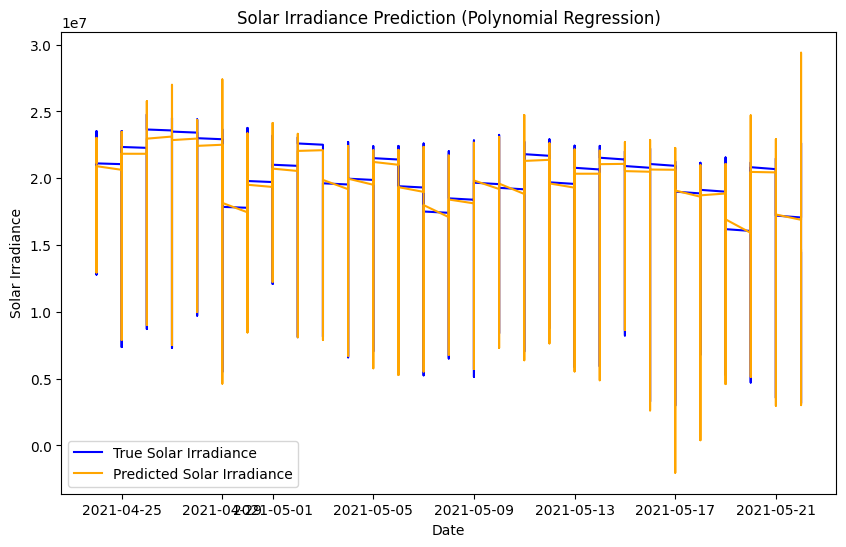

In [9]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the data (ensure your data is in the same directory)
data = merged_data.dropna()
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)


data=data.head(2000000)
# Select relevant columns (latitude, longitude, Solar_Irradiance, Rainfall, Humidity, Temperature)
features = data[['latitude', 'longitude', 'Solar_Irradiance']].values

# Define a function to create the dataset with 7 previous days of data
def create_polynomial_dataset(dataset, time_step=21):
    X, y = [], []
    for i in range(len(dataset) - time_step - 1):
        past_7_days = dataset[i:(i + time_step), :]
        X.append(past_7_days.flatten())  # Flatten to get 7-day data in a single row
        y.append(dataset[i + time_step, 2])  # Predict Solar_Irradiance (column index 2)
    return np.array(X), np.array(y)

# Define the time step as 7 days (for the past week's data)
time_step = 7
X, y = create_polynomial_dataset(features, time_step)

# Apply Polynomial Features (degree=2 for simplicity)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Split the data into training and testing sets
train_size = int(len(X_poly) * 0.8)
X_train, X_test = X_poly[:train_size], X_poly[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Train a Polynomial Regression model (Linear Regression on Polynomial Features)
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test data
test_predict = model.predict(X_test)

# Plot the actual vs predicted Solar Irradiance values
plt.figure(figsize=(10,6))
plt.plot(data.index[train_size + time_step + 1:], y_test, label='True Solar Irradiance', color='blue')
plt.plot(data.index[train_size + time_step + 1:], test_predict, label='Predicted Solar Irradiance', color='orange')
plt.xlabel('Date')
plt.ylabel('Solar Irradiance')
plt.title('Solar Irradiance Prediction (Polynomial Regression)')
plt.legend()
plt.show()

# Prediction function
def predict_solar_irradiance_poly(coordinates, past_7_days_data):
    input_data = np.array(coordinates + past_7_days_data).flatten().reshape(1, -1)
    input_data_poly = poly.transform(input_data)
    prediction = model.predict(input_data_poly)
    return prediction[0]


In [2]:
merged_data

NameError: name 'merged_data' is not defined

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [8]:
# Select relevant columns (latitude, longitude, Solar_Irradiance, Rainfall, Humidity, Temperature)
features = merged_data[['latitude', 'longitude', 'Solar_Irradiance']].values

# Define a function to create the dataset with 7 previous days of data
def create_polynomial_dataset(dataset, time_step=21):
    X, y = [], []
    for i in range(len(dataset) - time_step - 1):
        past_7_days = dataset[i:(i + time_step), :]
        X.append(past_7_days.flatten())  # Flatten to get 7-day data in a single row
        y.append(dataset[i + time_step, 2])  # Predict Solar_Irradiance (column index 2)
    return np.array(X), np.array(y)

# Define the time step as 7 days (for the past week's data)
time_step = 7
X, y = create_polynomial_dataset(features, time_step)

In [ ]:
# Apply Polynomial Features (degree=2 for simplicity)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Split the data into training and testing sets
train_size = int(len(X_poly) * 0.8)
X_train, X_test = X_poly[:train_size], X_poly[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Train a Polynomial Regression model (Linear Regression on Polynomial Features)
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test data
test_predict = model.predict(X_test)

# Plot the actual vs predicted Solar Irradiance values
plt.figure(figsize=(10,6))
plt.plot(data.index[train_size + time_step + 1:], y_test, label='True Solar Irradiance', color='blue')
plt.plot(data.index[train_size + time_step + 1:], test_predict, label='Predicted Solar Irradiance', color='orange')
plt.xlabel('Date')
plt.ylabel('Solar Irradiance')
plt.title('Solar Irradiance Prediction (Polynomial Regression)')
plt.legend()
plt.show()

# Prediction function
def predict_solar_irradiance_poly(coordinates, past_7_days_data):
    input_data = np.array(coordinates + past_7_days_data).flatten().reshape(1, -1)
    input_data_poly = poly.transform(input_data)
    prediction = model.predict(input_data_poly)
    return prediction[0]

In [17]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import json
import datetime

# Load the data (ensure your data is in the same directory)
data = merged_data
data = data.head(2000000)

# Select relevant columns (latitude, longitude, Solar_Irradiance)
features = data[['latitude', 'longitude', 'Solar_Irradiance']].values

# Define a function to create the dataset with 7 previous days of data
def create_polynomial_dataset(dataset, time_step=7):
    X, y = [], []
    for i in range(len(dataset) - time_step - 1):
        past_7_days = dataset[i:(i + time_step), :]
        X.append(past_7_days.flatten())  # Flatten to get 7-day data in a single row
        y.append(dataset[i + time_step, 2])  # Predict Solar_Irradiance (column index 2)
    return np.array(X), np.array(y)

# Define the time step as 7 days (for the past week's data)
time_step = 7
X, y = create_polynomial_dataset(features, time_step)

# Apply Polynomial Features (degree=2 for simplicity)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Split the data into training and testing sets
train_size = int(len(X_poly) * 0.8)
X_train, X_test = X_poly[:train_size], X_poly[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Train a Polynomial Regression model (Linear Regression on Polynomial Features)
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test data
test_predict = model.predict(X_test)

# --- 1. Model Evaluation ---
mse = mean_squared_error(y_test, test_predict)
r2 = r2_score(y_test, test_predict)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# --- 2. Predict 1 year ahead (365 days) and save in JSON ---

# Initialize variables for prediction
last_7_days = features[-7:, :]  # Take the last 7 days from the dataset
predictions = []

# Start date: 1 October 2024
start_date = datetime.date(2024, 10, 1)

# Start predicting for the next 365 days
for day in range(365):
    # Flatten last 7 days' data and transform using polynomial features
    last_7_days_flat = last_7_days.flatten().reshape(1, -1)
    last_7_days_poly = poly.transform(last_7_days_flat)

    # Predict Solar Irradiance for the next day
    next_day_pred = model.predict(last_7_days_poly)[0]

    # Append the prediction with the new date
    next_date = start_date + datetime.timedelta(days=day)
    predictions.append({
        "Date": next_date.strftime('%Y-%m-%d'),
        "Predicted_Solar_Irradiance": next_day_pred
    })

    # Update last_7_days by removing the oldest day and appending the predicted day
    next_day_data = np.array([last_7_days[-1, 0], last_7_days[-1, 1], next_day_pred])
    last_7_days = np.vstack([last_7_days[1:], next_day_data])

# Save predictions to a JSON file
with open('predictions_1_year.json', 'w') as f:
    json.dump(predictions, f, indent=4)

print("1-year predictions saved to 'predictions_1_year.json'")

Mean Squared Error (MSE): 715039220862.8274
R-squared (R²): 0.9217785730523571
1-year predictions saved to 'predictions_1_year.json'


In [12]:
merged_data

,latitude,longitude,Solar_Irradiance,Rainfall,Humidity,Temperature
Date,,,,,,
2021-01-01,5.8,100.3,18265278.0,NaN,NaN,NaN
2021-01-01,5.8,100.4,17386926.0,NaN,NaN,NaN
2021-01-01,5.8,100.5,16946978.0,NaN,NaN,NaN
2021-01-01,5.8,100.6,16539937.0,NaN,NaN,NaN
2021-01-01,5.8,100.7,16686779.0,NaN,NaN,NaN
...,...,...,...,...,...,...
2023-12-31,-10.2,124.1,24371384.0,NaN,NaN,NaN
2023-12-31,-10.2,124.2,25068092.0,NaN,NaN,NaN
2023-12-31,-10.3,123.6,23109614.0,0.176817,77.534874,30.084213


In [12]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import json
import datetime

# Load the data (ensure your data is in the same directory)
data = merged_data
data = data.head(300000)
data.dropna(inplace=True)

# Select relevant columns (latitude, longitude, Solar_Irradiance)
features = data[['latitude', 'longitude', 'Solar_Irradiance']].values

# Define a function to create the dataset with 7 previous days of data
def create_polynomial_dataset(dataset, time_step=7):
    X, y = [], []
    for i in range(len(dataset) - time_step - 1):
        past_7_days = dataset[i:(i + time_step), :]
        X.append(past_7_days.flatten())  # Flatten to get 7-day data in a single row
        y.append(dataset[i + time_step, 2])  # Predict Solar_Irradiance (column index 2)
    return np.array(X), np.array(y)

# Define the time step as 7 days (for the past week's data)
time_step = 7
X, y = create_polynomial_dataset(features, time_step)

# Apply Polynomial Features (degree=2 for simplicity)
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# Split the data into training and testing sets
train_size = int(len(X_poly) * 0.8)
X_train, X_test = X_poly[:train_size], X_poly[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Train a Polynomial Regression model (Linear Regression on Polynomial Features)
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test data
test_predict = model.predict(X_test)

# --- 1. Model Evaluation ---
mse = mean_squared_error(y_test, test_predict)
r2 = r2_score(y_test, test_predict)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# --- 2. Predict 1 year ahead (365 days) and save in JSON ---

# Initialize variables for prediction
last_7_days = features[-7:, :]  # Take the last 7 days from the dataset
predictions = []

# Start date: 1 October 2024
start_date = datetime.date(2024, 10, 1)

# Start predicting for the next 365 days
for day in range(365):
    # Flatten last 7 days' data and transform using polynomial features
    last_7_days_flat = last_7_days.flatten().reshape(1, -1)
    last_7_days_poly = poly.transform(last_7_days_flat)

    # Predict Solar Irradiance for the next day
    next_day_pred = model.predict(last_7_days_poly)[0]

    # Append the prediction with the new date
    next_date = start_date + datetime.timedelta(days=day)
    predictions.append({
        "Date": next_date.strftime('%Y-%m-%d'),
        "Predicted_Solar_Irradiance": next_day_pred
    })

    # Update last_7_days by removing the oldest day and appending the predicted day
    next_day_data = np.array([last_7_days[-1, 0], last_7_days[-1, 1], next_day_pred])
    last_7_days = np.vstack([last_7_days[1:], next_day_data])

# Save predictions to a JSON file
with open('predictions_1_year_Temperature.json', 'w') as f:
    json.dump(predictions, f, indent=4)

print("1-year predictions saved to 'predictions_1_year.json'")

<ipython-input-12-847317821584>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


Mean Squared Error (MSE): 1108204232929.6025
R-squared (R²): 0.894588821875976
1-year predictions saved to 'predictions_1_year.json'


In [13]:
import pickle

with open('Solar_Irradiance.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)